# Import Library and Dataset

In [151]:
import matplotlib.pyplot as plt
import matplotlib as pt
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [152]:
url = 'https://raw.githubusercontent.com/Gitroars/BS_FoDS_Project/main/Dataset/Top_100_most_Streamed_-_Sheet1.csv'
df = pd.read_csv(url)
df

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56


# DATA MUNGING 

In [153]:
df.info

<bound method DataFrame.info of                                   title         artist  \
0                       Blinding Lights     The Weeknd   
1                      Watermelon Sugar   Harry Styles   
2                Mood (feat. iann dior)       24kGoldn   
3                     Someone You Loved  Lewis Capaldi   
4                               Perfect     Ed Sheeran   
..                                  ...            ...   
95                            One Dance          Drake   
96                                Sugar       Maroon 5   
97                             Emotions     Mark Mendy   
98                           Cold Water    Major Lazer   
99  I Took A Pill In Ibiza - Seeb Remix    Mike Posner   

                    top genre  year  beats.per.minute  energy  danceability  \
0   canadian contemporary r&b  2020               171      73            51   
1                         pop  2019                95      82            55   
2                    cali rap  202

In [154]:
df.rename(columns = {'top genre':'top_genre'}, inplace = True)

In [155]:
df.top_genre.value_counts()

dance pop                    28
pop                          11
dfw rap                       7
modern rock                   6
canadian pop                  6
canadian contemporary r&b     4
electropop                    4
melodic rap                   3
latin                         2
folk-pop                      2
canadian hip hop              2
emo rap                       2
rap                           2
north carolina hip hop        1
boy band                      1
detroit hip hop               1
electro house                 1
australian dance              1
beatlesque                    1
cali rap                      1
danish pop                    1
acoustic pop                  1
lgbtq+ hip hop                1
gangster rap                  1
chicago rap                   1
australian pop                1
alternative rock              1
conscious hip hop             1
classic rock                  1
neo soul                      1
pop rap                       1
brostep 

In [156]:
df.head()

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [157]:
df.tail()

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56
99,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,dance pop,2016,102,73,67,-7,9,66,198,3,10,53


In [158]:
df.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


In [159]:
df.isnull().sum()

title               0
artist              0
top_genre           0
year                0
beats.per.minute    0
energy              0
danceability        0
loudness.dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64

In [160]:
df.isnull().values.any()

False

In [161]:
df2 = df.dropna()

In [162]:
print(df2.dtypes)
print(df.dtypes)

title               object
artist              object
top_genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object
title               object
artist              object
top_genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object


In [163]:
df2.isnull().values.any()

False

C:\Users\Harris\AppData\Local\Temp\ipykernel_1604\1441594836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=.3, center=0,


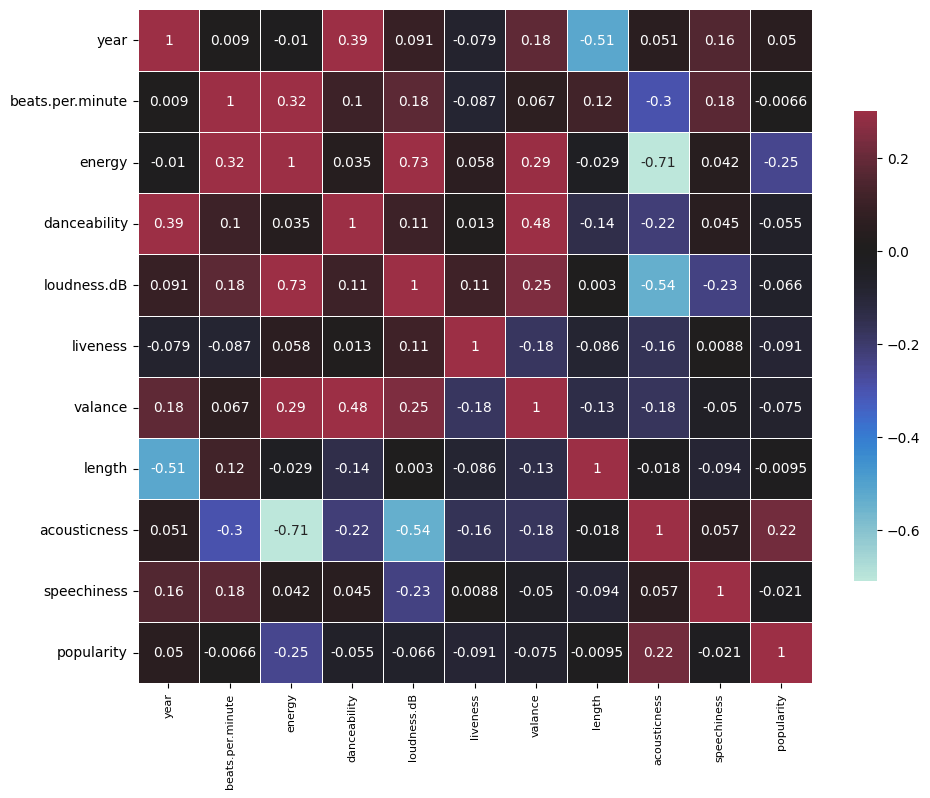

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

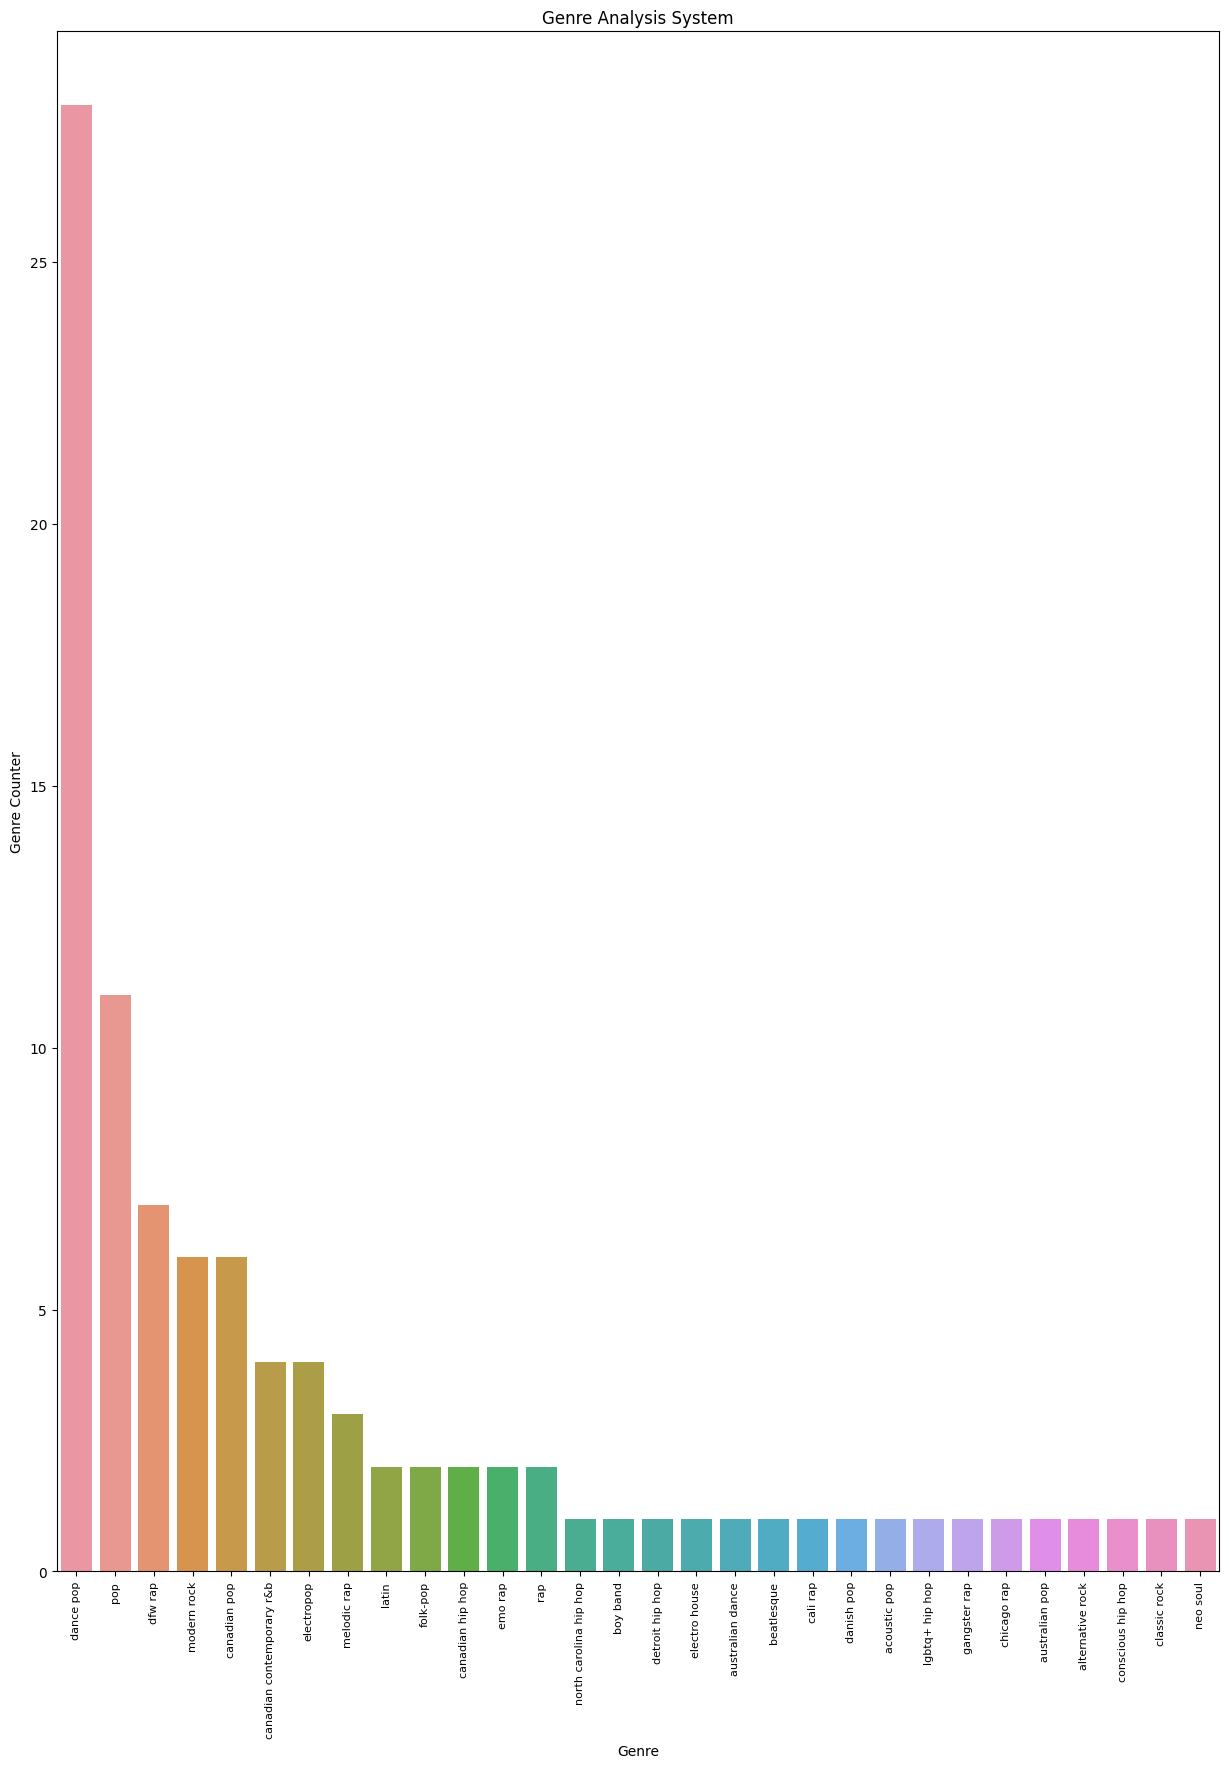

In [165]:
# Print variance age data from dataset
sns.barplot(x=df2.top_genre.value_counts()[:30].index,y=df.top_genre.value_counts()[:30].values)
plt.xlabel('Genre')
plt.ylabel('Genre Counter')
plt.title('Genre Analysis System')
plt.rcParams["figure.figsize"] = (15, 20)
plt.rcParams["xtick.labelsize"] = 8
plt.xticks(rotation=90)
plt.show()

In [166]:
# #add new column 'GenreRange' into dataset and normalize the data
# df2['Genre_Range']=0
# year1_index=df2[(df2.year<=2015)].index 
# year2_index=df2[(df2.year>=2016) & (df2.year<=2018)].index
# year3_index=df2[(df2.year>2018)].index
# for index in year3_index:
#     df2.loc[index,'Genre_Range']=2
    
# for index in year2_index:
#     df2.loc[index,'Genre_Range']=1

# for index in year1_index:
#     df2.loc[index,'Genre_Range']=0

# # Draw a categorical scatterplot to show each observation
# sns.swarmplot(x="Genre_Range", y="year",hue='top_genre',
#                palette=["red", "cyan", "red","red","cyan","red","cyan","red","red","red","red","red","red","cyan","cyan",
#                         "red","red","red","red","red","red","cyan","red","cyan","cyan","red","cyan","cyan","red","red","red",
#                         "red","red","cyan"], data=df2)
# plt.show()

# GROUPING THE GENRE

In [167]:
values = ['canadian contemporary r&b','latin', 'electro house','australian dance','beatlesque','neo soul','brostep','irish singer-songwriter']
df2 = df2[df2.top_genre.isin(values) == False]
# Change genre into numeric value
df2['genre_class'] = 0
#Maingroup
#Pop Class
df2.loc[df2.top_genre == 'dance pop','genre_class'] = 0
df2.loc[df2.top_genre == 'pop','genre_class'] = 0
df2.loc[df2.top_genre == 'canadian pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'electropop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'folk-pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'danish pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'acoustic pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'australian pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'pop dance','genre_class'] = 0
df2.loc[df2.top_genre == 'boy band', 'genre_class'] = 0
#Rap Class
df2.loc[df2.top_genre == 'dfw rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'melodic rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'emo rap','genre_class'] = 1
df2.loc[df2.top_genre == 'rap','genre_class'] = 1
df2.loc[df2.top_genre == 'cali rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'gangster rap','genre_class'] = 1
df2.loc[df2.top_genre == 'chicago rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'pop rap', 'genre_class'] = 1
#Rock Class
df2.loc[df2.top_genre == 'modern rock', 'genre_class'] = 2
df2.loc[df2.top_genre == 'alternative rock', 'genre_class'] = 2
#Hip Hop Class
df2.loc[df2.top_genre == 'canadian hip hop', 'genre_class'] = 3 
df2.loc[df2.top_genre == 'north carolina hip hop', 'genre_class'] = 3
df2.loc[df2.top_genre == 'detroit hip hop', 'genre_class'] = 3
df2.loc[df2.top_genre == 'lgbtq+ hip hop','genre_class'] = 3
df2.loc[df2.top_genre == 'conscious hip hop', 'genre_class'] = 3



#Group for all genre
# df2.loc[df2.top_genre == 'dance pop','genre_class'] = 0
# df2.loc[df2.top_genre == 'pop','genre_class'] = 1
# df2.loc[df2.top_genre == 'dfw rap', 'genre_class'] = 2
# df2.loc[df2.top_genre == 'modern rock', 'genre_class'] = 3
# df2.loc[df2.top_genre == 'canadian pop', 'genre_class'] = 4
# df2.loc[df2.top_genre == 'canadian contemporary r&b', 'genre_class'] = 5
# df2.loc[df2.top_genre == 'electropop', 'genre_class'] = 6
# df2.loc[df2.top_genre == 'melodic rap', 'genre_class'] = 7
# df2.loc[df2.top_genre == 'latin', 'genre_class'] = 8
# df2.loc[df2.top_genre == 'folk-pop', 'genre_class'] = 9
# df2.loc[df2.top_genre == 'canadian hip hop', 'genre_class'] = 10
# df2.loc[df2.top_genre == 'emo rap','genre_class'] = 11
# df2.loc[df2.top_genre == 'rap','genre_class'] = 12
# df2.loc[df2.top_genre == 'north carolina hip hop', 'genre_class'] = 13
# df2.loc[df2.top_genre == 'boy band', 'genre_class'] = 14
# df2.loc[df2.top_genre == 'detroit hip hop', 'genre_class'] = 15
# df2.loc[df2.top_genre == 'electro house', 'genre_class'] = 16
# df2.loc[df2.top_genre == 'australian dance', 'genre_class'] = 17
# df2.loc[df2.top_genre == 'beatlesque', 'genre_class'] = 18
# df2.loc[df2.top_genre == 'cali rap', 'genre_class'] = 19
# df2.loc[df2.top_genre == 'danish pop', 'genre_class'] = 20
# df2.loc[df2.top_genre == 'acoustic pop', 'genre_class'] = 21
# df2.loc[df2.top_genre == 'lgbtq+ hip hop','genre_class'] = 22
# df2.loc[df2.top_genre == 'gangster rap','genre_class'] = 23
# df2.loc[df2.top_genre == 'chicago rap', 'genre_class'] = 24
# df2.loc[df2.top_genre == 'australian pop', 'genre_class'] = 25
# df2.loc[df2.top_genre == 'alternative rock', 'genre_class'] = 26
# df2.loc[df2.top_genre == 'conscious hip hop', 'genre_class'] = 27
# df2.loc[df2.top_genre == 'classic rock', 'genre_class'] = 28
# df2.loc[df2.top_genre == 'neo soul', 'genre_class'] = 29
# df2.loc[df2.top_genre == 'pop rap', 'genre_class'] = 30
# df2.loc[df2.top_genre == 'brostep', 'genre_class'] = 31
# df2.loc[df2.top_genre == 'irish singer-songwriter', 'genre_class'] = 32
# df2.loc[df2.top_genre == 'pop dance','genre_class'] = 33


df2.drop(labels=['top_genre'], axis=1)

,title,artist,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
1,Watermelon Sugar,Harry Styles,2019,95,82,55,-4,34,56,174,12,5,88,0
2,Mood (feat. iann dior),24kGoldn,2021,91,72,70,-4,32,73,141,17,4,88,1
3,Someone You Loved,Lewis Capaldi,2019,110,41,50,-6,11,45,182,75,3,86,0
4,Perfect,Ed Sheeran,2017,95,45,60,-6,11,17,263,16,2,86,0
5,Believer,Imagine Dragons,2017,125,78,78,-4,8,67,204,6,13,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,2016,104,61,79,-6,32,43,174,1,6,66,3
96,Sugar,Maroon 5,2015,120,79,75,-7,9,88,235,6,3,66,0
97,Emotions,Mark Mendy,2021,126,83,66,-5,40,74,172,5,29,66,0
98,Cold Water,Major Lazer,2018,93,80,61,-5,16,50,185,7,4,56,0


In [168]:
df2

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,0
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,1
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,0
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,0
5,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66,3
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66,0
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66,0
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56,0


C:\Users\Harris\AppData\Local\Temp\ipykernel_1604\1911662167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),vmax=.3, center=0,


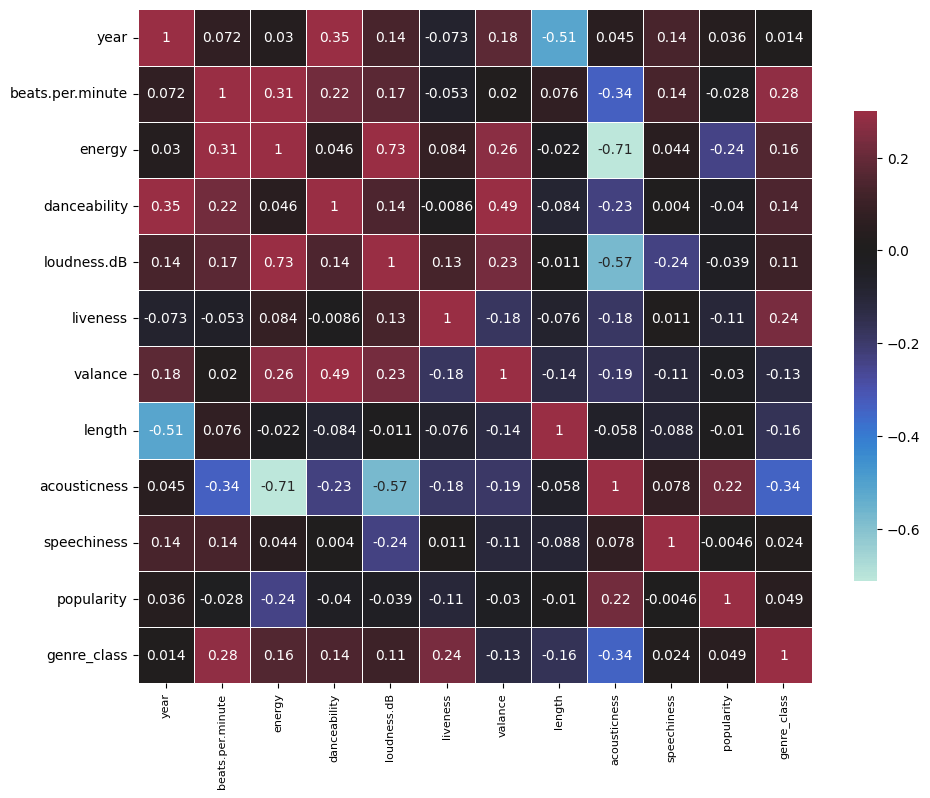

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             88 non-null     object
 1   artist            88 non-null     object
 2   top_genre         88 non-null     object
 3   year              88 non-null     int64 
 4   beats.per.minute  88 non-null     int64 
 5   energy            88 non-null     int64 
 6   danceability      88 non-null     int64 
 7   loudness.dB       88 non-null     int64 
 8   liveness          88 non-null     int64 
 9   valance           88 non-null     int64 
 10  length            88 non-null     int64 
 11  acousticness      88 non-null     int64 
 12  speechiness       88 non-null     int64 
 13  popularity        88 non-null     int64 
 14  genre_class       88 non-null     int64 
dtypes: int64(12), object(3)
memory usage: 11.0+ KB


In [171]:
df2.genre_class.value_counts()

0    57
1    18
2     7
3     6
Name: genre_class, dtype: int64

In [172]:
df2.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2016.147727,114.318182,61.897727,68.045455,-6.193182,17.534091,49.909091,212.477273,25.431818,10.068182,79.681818,0.568182
std,5.156270,24.846908,16.426107,13.660000,2.050276,13.634767,21.559134,37.138751,26.168682,9.659485,5.962614,0.907130
min,1975.000000,71.000000,11.000000,35.000000,-14.000000,3.000000,6.000000,119.000000,0.000000,2.000000,53.000000,0.000000
25%,2015.000000,95.000000,51.000000,60.750000,-7.000000,10.000000,34.000000,187.000000,4.000000,4.000000,79.000000,0.000000
50%,2017.000000,114.000000,62.000000,72.000000,-6.000000,12.000000,48.000000,207.000000,14.000000,6.000000,81.000000,0.000000
75%,2018.000000,134.000000,75.000000,78.000000,-5.000000,18.000000,65.250000,234.000000,44.000000,11.000000,83.000000,1.000000
max,2021.000000,171.000000,92.000000,91.000000,-3.000000,79.000000,93.000000,354.000000,98.000000,46.000000,88.000000,3.000000


# SPLIT THE DATASET INTO TRAIN AND TEST SET

In [173]:
#Splitting data
import sklearn
from sklearn.model_selection import train_test_split

# head of the data
print(df2.head())

x = df2.iloc[:,[4,8,11]]
y = df2.loc[:,'genre_class']

print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


                    title           artist    top_genre  year  \
1        Watermelon Sugar     Harry Styles          pop  2019   
2  Mood (feat. iann dior)         24kGoldn     cali rap  2021   
3       Someone You Loved    Lewis Capaldi          pop  2019   
4                 Perfect       Ed Sheeran          pop  2017   
5                Believer  Imagine Dragons  modern rock  2017   

   beats.per.minute  energy  danceability  loudness.dB  liveness  valance  \
1                95      82            55           -4        34       56   
2                91      72            70           -4        32       73   
3               110      41            50           -6        11       45   
4                95      45            60           -6        11       17   
5               125      78            78           -4         8       67   

   length  acousticness  speechiness  popularity  genre_class  
1     174            12            5          88            0  
2     141         

# MODEL & TECHNIQUE AND EVALUATION 

**The models with using accuracy and confusion matrix as the evaluation method**

In [174]:
from sklearn.metrics import classification_report, confusion_matrix

**1.Decision Tree**

In [175]:
# import sklearn.metrics as metrics
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# dt = DecisionTreeClassifier(criterion='entropy')
# dt.fit(x_train,y_train)
# y_predict = dt.predict(x_test)
# print(metrics.accuracy_score(y_test,y_predict))

**2.SVM**

In [176]:
# ended up not using

# from sklearn.svm import LinearSVC

# clf = LinearSVC().fit(x_train, y_train)
# print('spotify dataset')
# print('Accuracy of Linear SVC classifier on training set: {:.2f}'
#      .format(clf.score(x_train, y_train)))
# print('Accuracy of Linear SVC classifier on test set: {:.2f}'
#      .format(clf.score(x_test, y_test)))

In [177]:
svm_linear=SVC(kernel='linear', C=3,gamma=3).fit(x_train, y_train)
y_predict = svm_linear.predict(x_test)
print(classification_report(y_test,y_predict))
# svm_linear.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1

    accuracy                           0.78        27
   macro avg       0.19      0.25      0.22        27
weighted avg       0.60      0.78      0.68        27



c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [178]:
svm_rbf=SVC(kernel='rbf', C=2,gamma=3).fit(x_train, y_train)
y_predict = svm_rbf.predict(x_test)
print(classification_report(y_test,y_predict))
# svm_rbf.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1

    accuracy                           0.67        27
   macro avg       0.20      0.21      0.20        27
weighted avg       0.61      0.67      0.64        27



c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [179]:
svm_sigmoid=SVC(kernel='sigmoid', C=3,gamma=3).fit(x_train, y_train)
y_predict = svm_rbf.predict(x_test)
print(classification_report(y_test,y_predict))
# svm_sigmoid.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1

    accuracy                           0.67        27
   macro avg       0.20      0.21      0.20        27
weighted avg       0.61      0.67      0.64        27



c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [180]:
svm_poly=SVC(kernel='poly', C=3,gamma=3).fit(x_train, y_train)
y_predict = svm_rbf.predict(x_test)
print(classification_report(y_test,y_predict))
# svm_poly.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1

    accuracy                           0.67        27
   macro avg       0.20      0.21      0.20        27
weighted avg       0.61      0.67      0.64        27



c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harris\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Predict data

**Predict the genre from dataset**

In [190]:
df2.loc[[3]]

,title,artist,top_genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,genre_class
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,0


In [182]:
x_test

array([[-0.17244427, -0.58380956,  2.05800116],
       [ 1.06509693, -0.73250427,  1.4249696 ],
       [-0.91496898, -0.13772543,  1.62279196],
       [ 0.36382359,  0.45705341, -0.03891587],
       [ 1.8901244 , -0.36076749, -0.27630271],
       [ 2.22013538, -0.28642014, -0.86976979],
       [-0.91496898, -0.65815691,  1.22714724],
       [-1.28623134, -0.58380956, -0.47412507],
       [ 0.44632633, -0.43511485,  1.34584066],
       [-0.50245525, -0.73250427, -0.79064085],
       [-0.74996349, -0.73250427,  1.38540513],
       [-1.45123683, -0.06337807,  0.95019593],
       [ 0.32257221, -0.5094622 , -0.63238296],
       [-0.584958  , -0.43511485, -0.47412507],
       [-0.95622036, -0.80685162,  2.41408141],
       [ 0.40507496, -0.21207278, -0.90933427],
       [ 0.11631535,  4.47181059, -0.51368954],
       [-1.40998546, -0.95554633,  0.55455121],
       [ 0.15756672, -0.21207278, -0.23673824],
       [-1.24497997, -0.58380956,  1.4249696 ],
       [ 2.30263813, -0.95554633, -0.711

In [183]:
y_test

3     0
15    0
59    0
47    1
72    0
34    2
51    0
49    0
87    0
99    0
8     0
29    0
39    0
69    0
9     0
18    0
26    1
62    0
85    0
48    0
24    2
7     1
67    3
54    0
90    0
60    0
80    0
Name: genre_class, dtype: int64

In [191]:
res = svm_linear.predict(x_test.loc[[3]])
res

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [192]:
res = svm_sigmoid.predict(x_test.loc[[3]])
res

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
res = svm_poly.predict(x_test.loc[[3]])
res

In [ ]:
res = svm_rbf.predict(x_test.loc[[3]])
res

**Predict genre from dummy data**

In [ ]:
column_names = x_test.columns.values.tolist()

In [ ]:
column_names

In [ ]:
data = {
 'beats.per.minute' :[100],
 'energy' :[85],
 'danceability' :[75],
 'loudness.dB' :[-4],
 'liveness' :[9],
 'valance' :[70],
 'length' :[207],
 'acousticness' :[7],
 'speechiness' :[18],
 'popularity' :[86],

}

In [ ]:
df_test = pd.DataFrame(data)

In [ ]:
df_test

In [ ]:
res = df.predict(df_test)
res

In [ ]:
res = svm_linear.predict(df_test)
res

In [ ]:
res = svm_sigmoid.predict(df_test)
res

In [ ]:
res = svm_poly.predict(df_test)
res

In [ ]:
data = {
 'beats.per.minute' :[114],
 'energy' :[62],
 'danceability' :[68],
 'loudness.dB' :[-6],
 'liveness' :[17],
 'valance' :[50],
 'length' :[212],
 'acousticness' :[25],
 'speechiness' :[10],
 'popularity' :[80]
}
df_test = pd.DataFrame(data)
df_test

In [ ]:
res = dt.predict(df_test)
res

In [ ]:
res0 = svm_linear.predict(df_test)
res0

In [ ]:
res1 = svm_sigmoid.predict(df_test)
res1

In [ ]:
res2 = svm_poly.predict(df_test)
res2